In [5]:
'''
pip install google-api-python-client
pip install pandas
pip install seaborn
pip install matplotlib
pip install python-dateutil
pip install wordcloud
'''

'\npip install google-api-python-client\npip install pandas\npip install seaborn\npip install matplotlib\npip install python-dateutil\npip install wordcloud\n'

In [6]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import JSON
from googleapiclient.errors import HttpError
from dateutil import parser
import os
from dotenv import load_dotenv

# NLP
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'googleapiclient'

In [ ]:
load_dotenv()
api_key = os.getenv('API_KEY')

In [ ]:
# using my own youtube channel id as an example
channel_ids = ['UC1J4VfQMRNJu7RhxejyMweg',
              #more channels
              ]

In [ ]:
    api_service_name = "youtube"
    api_version = "v3"

    # Get credentials and create an API client
    youtube = build(
        api_service_name, api_version, developerKey=api_key)

In [ ]:
def get_channel_stats(youtube, channel_ids):
    '''
    Get channel stats
    
    Paramaters:
    -----------
    youtube: build object of youtube API
    channel_ids: list of channel IDS
    '''
    
    
    all_data = []
    
    request = youtube.channels().list(
        part = "snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
               'subscribers': item['statistics']['subscriberCount'],
               'views': item['statistics']['viewCount'],
               'totalViews': item['statistics']['videoCount'],
               'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
    
    return(pd.DataFrame(all_data))

In [ ]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [ ]:
channel_stats

,channelName,subscribers,views,totalViews,playlistId
0,Jeremy hernandez,421,503496,149,UU1J4VfQMRNJu7RhxejyMweg


In [ ]:
playlist_id = "UU1J4VfQMRNJu7RhxejyMweg"

def get_video_ids(youtube, playlist_id):

    video_ids = []
    
    request = youtube.playlistItems().list(
        part = "snippet,contentDetails",
        playlistId = playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')    
    '''
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part = "snippet,contentDetails",
            playlistId = playlist_id,
            maxResults = 50
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
    '''
    return video_ids

In [ ]:
video_ids = get_video_ids(youtube, playlist_id)

In [ ]:
video_ids

['dRSq1oozlGE',
 'k20Lf4KBrE4',
 'ufaoBT8F0YE',
 'GvSAuYtN0qY',
 'sQ4QHanS1yU',
 'yKotlOfCo-w',
 'W9AZGDlGFFI',
 'T2PdYAZDB_w',
 'srKZbvZC6hc',
 '-5SMM_9ffGQ',
 'kWXRB7Rv9Ps',
 'nhAjAnBNkWI',
 '-vqOWQDDwmI',
 'CJ4hgQUOySo',
 'zjDF4RDdLxA',
 'pUYHEGi_kPU',
 'PRrXocnIZIY',
 '78IyUpkMTI0',
 'ZxUpoLDl5Hg',
 'sHFD7yaHLm4',
 'M_Pdor0AhZg',
 'A_ZeU_te0Mw',
 'd8BL0fJfGu0',
 'qtpiVpBfW-E',
 'PY2jUOs96Vk',
 'oCgOLuWZXTg',
 'wiY6W5XE5zQ',
 'yxEw9Zxcj0A',
 'JTvAGkQagSI',
 '_axqBb6jqaA',
 'b6d5jQJEtuw',
 'NI2qvGcid0o',
 'P9wuyXtpa6w',
 '_IrXSSS6Tj8',
 '1D4kHmcjY7A',
 'ImAkXYImjOY',
 '2iWQM5ldubw',
 'hgRs4vNaBz8',
 '-VuoBLOVLcU',
 '2ahVcR7t6Us',
 'dQE1AX5F9Sc',
 'jpO739nWoyI',
 'MBWor_wZisA',
 'fNnZrDh0V1M',
 'tDPOtLw7L9Q',
 'D9L8q0A7M5s',
 '-kdoOGWKIU8',
 '_WlLF-yljQ4',
 'hGa1lVldqI0',
 'dHVRP0WYa4E']

In [ ]:
def get_video_info(youtube, video_ids):
    
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part = "snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
            )
        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount','likeCount','favouriteCount','commentCount'],
                             'contentDetails': ['duration','definition','caption']
                            }
            video_info = {}
            video_info['id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
        
    return pd.DataFrame(all_video_info)
            

In [ ]:
video_df = get_video_info(youtube, video_ids)
video_df

,id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,dRSq1oozlGE,Jeremy hernandez,Every gymrats dream #motivation,,None,2023-11-13T19:25:01Z,2427,None,None,2,PT15S,hd,false
1,k20Lf4KBrE4,Jeremy hernandez,I hope my absence…,,None,2023-10-26T05:26:21Z,470,15,None,1,PT10S,hd,false
2,ufaoBT8F0YE,Jeremy hernandez,🗣️: You only care about that stupid gym,,None,2023-10-25T03:45:22Z,805,15,None,0,PT7S,hd,false
3,GvSAuYtN0qY,Jeremy hernandez,🙏,,None,2023-10-25T03:44:26Z,3827,201,None,5,PT8S,hd,false
4,sQ4QHanS1yU,Jeremy hernandez,Sometimes it’s more than just building muscle,,None,2023-10-11T04:39:23Z,1553,None,None,2,PT11S,hd,false
5,yKotlOfCo-w,Jeremy hernandez,She deserves better,,None,2023-10-09T12:59:52Z,2207,None,None,5,PT11S,hd,false
6,W9AZGDlGFFI,Jeremy hernandez,I failed,,None,2023-10-08T16:08:17Z,4467,None,None,4,PT14S,hd,false
7,T2PdYAZDB_w,Jeremy hernandez,Strangers with memories 🌹,,None,2023-10-08T13:53:32Z,2289,None,None,1,PT11S,hd,false
8,srKZbvZC6hc,Jeremy hernandez,What’s your biggest PR?,,None,2023-10-07T18:35:57Z,3607,None,None,4,PT13S,hd,false
9,-5SMM_9ffGQ,Jeremy hernandez,Baby don’t hurt me…,,None,2023-06-11T13:39:30Z,5039,None,None,6,PT11S,hd,false


## Data pre-processing

In [ ]:
video_df.isnull().any()

id                False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [ ]:
video_df.dtypes

id                object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [ ]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [ ]:
# Published
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [ ]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))

In [ ]:
video_df[['durationSecs', 'duration']]

,durationSecs,duration
0,0 days 00:00:15,PT15S
1,0 days 00:00:10,PT10S
2,0 days 00:00:07,PT7S
3,0 days 00:00:08,PT8S
4,0 days 00:00:11,PT11S
5,0 days 00:00:11,PT11S
6,0 days 00:00:14,PT14S
7,0 days 00:00:11,PT11S
8,0 days 00:00:13,PT13S
9,0 days 00:00:11,PT11S


In [ ]:
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [ ]:
video_df

,id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagCount
0,dRSq1oozlGE,Jeremy hernandez,Every gymrats dream #motivation,,None,2023-11-13 19:25:01+00:00,2427.0,NaN,NaN,2.0,PT15S,hd,false,Monday,0 days 00:00:15,0
1,k20Lf4KBrE4,Jeremy hernandez,I hope my absence…,,None,2023-10-26 05:26:21+00:00,470.0,15.0,NaN,1.0,PT10S,hd,false,Thursday,0 days 00:00:10,0
2,ufaoBT8F0YE,Jeremy hernandez,🗣️: You only care about that stupid gym,,None,2023-10-25 03:45:22+00:00,805.0,15.0,NaN,0.0,PT7S,hd,false,Wednesday,0 days 00:00:07,0
3,GvSAuYtN0qY,Jeremy hernandez,🙏,,None,2023-10-25 03:44:26+00:00,3827.0,201.0,NaN,5.0,PT8S,hd,false,Wednesday,0 days 00:00:08,0
4,sQ4QHanS1yU,Jeremy hernandez,Sometimes it’s more than just building muscle,,None,2023-10-11 04:39:23+00:00,1553.0,NaN,NaN,2.0,PT11S,hd,false,Wednesday,0 days 00:00:11,0
5,yKotlOfCo-w,Jeremy hernandez,She deserves better,,None,2023-10-09 12:59:52+00:00,2207.0,NaN,NaN,5.0,PT11S,hd,false,Monday,0 days 00:00:11,0
6,W9AZGDlGFFI,Jeremy hernandez,I failed,,None,2023-10-08 16:08:17+00:00,4467.0,NaN,NaN,4.0,PT14S,hd,false,Sunday,0 days 00:00:14,0
7,T2PdYAZDB_w,Jeremy hernandez,Strangers with memories 🌹,,None,2023-10-08 13:53:32+00:00,2289.0,NaN,NaN,1.0,PT11S,hd,false,Sunday,0 days 00:00:11,0
8,srKZbvZC6hc,Jeremy hernandez,What’s your biggest PR?,,None,2023-10-07 18:35:57+00:00,3607.0,NaN,NaN,4.0,PT13S,hd,false,Saturday,0 days 00:00:13,0
9,-5SMM_9ffGQ,Jeremy hernandez,Baby don’t hurt me…,,None,2023-06-11 13:39:30+00:00,5039.0,NaN,NaN,6.0,PT11S,hd,false,Sunday,0 days 00:00:11,0


## Best Performing Videos

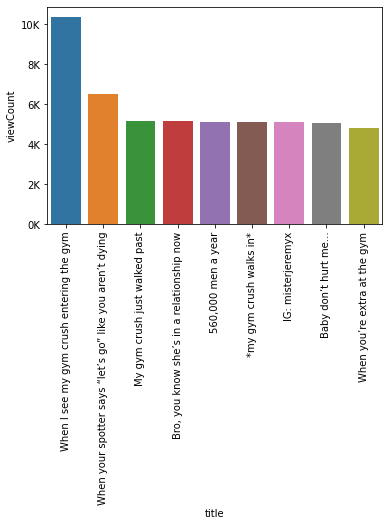

In [ ]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

## Worst Performing Videos

/Users/jeremy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeremy/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128483 missing from current font.
  font.set_text(s, 0, flags=flags)


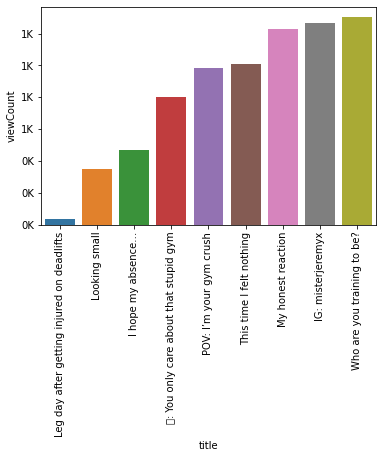

In [ ]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

## View distribution per video

/Users/jeremy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

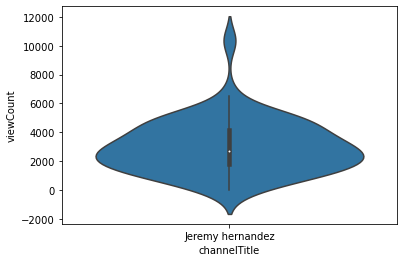

In [ ]:
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])

## Views vs. likes and comments

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

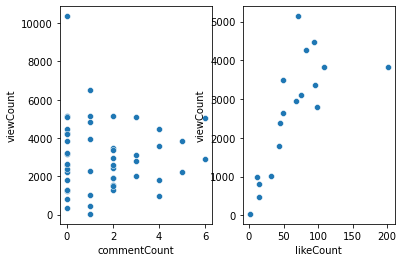

In [ ]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

## Video duration

In [ ]:
# sns.histplot(data = video_df, x = 'durationSecs', bins = 30)

In [ ]:
'''
from nltk.corpus import stopwords
titles = video_df['title'].tolist()
# Download NLTK stopwords if needed
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
titles_cleaned = [' '.join(word_tokenize(title.lower())) for title in titles]
'''

"\nfrom nltk.corpus import stopwords\ntitles = video_df['title'].tolist()\n# Download NLTK stopwords if needed\nimport nltk\nnltk.download('stopwords')\nnltk.download('punkt')\nfrom nltk.tokenize import word_tokenize\nimport string\ntitles_cleaned = [' '.join(word_tokenize(title.lower())) for title in titles]\n"

In [ ]:
'''
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize = (30,20))
    plt.imshow(wordcloud)
    plt.axis("off");
        
wordcloud = WordCloud(width = 2000, height = 1000, random_state = 1, background_color = 'black', colormap = 'viridis', collocations = False).generate(all_words_str)
plot_cloud(wordcloud)
'''

'\nstop_words = set(stopwords.words(\'english\'))\nvideo_df[\'title_no_stopwords\'] = video_df[\'title\'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])\n\nall_words = list([a for b in video_df[\'title_no_stopwords\'].tolist() for a in b])\nall_words_str = \' \'.join(all_words)\n\ndef plot_cloud(wordcloud):\n    plt.figure(figsize = (30,20))\n    plt.imshow(wordcloud)\n    plt.axis("off");\n        \nwordcloud = WordCloud(width = 2000, height = 1000, random_state = 1, background_color = \'black\', colormap = \'viridis\', collocations = False).generate(all_words_str)\nplot_cloud(wordcloud)\n'

## Graph for published days

In [ ]:
day_df = pd. DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar # (x = 'index', y = 'publishDayName', rot = 0)  # - fix this - 